# Simulation und Modellierung WS17/18 - Uebung 06

### Aufgabe 1: Erzeugung und Multiplikation von Vektoren und Matrizen

Die Ableitung einer Funktion $f(x)$ an einer Stelle $x_0$ kann mit Hilfe eines geeigneten Differenzenquotienten approximiert werden. Es gilt

$$
    \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h} = f'(x_0)
$$

- Definieren Sie eine `N`x`N` Matrix `D`, welche auf einen `N`x`1` Vektor `f` angewendet die symmetrische Differenz der Gitterpunkte $(Df)_i = f_{i+1}-f_{i-1}$ berechnet, wobei man periodische Randbedingungen $f_{i+N}=f_i$ annimmt. 
- berechnen Sie mit Hilfe dieser Matrix die erste und zweite Abbleitung der Funktion `f(x) = sin(x)` welche an `N` Gitterpunkten auf dem Intervall $[0,2\pi)$ gegeben sei.
- plotten Sie $f(x)$, $f'(x)$ und $f''(x)$ in ein Diagramm.

In [16]:
#Ausgabe der Plots im Notebook und laden von numpy und pylab (matplotlib+pyplot)
%matplotlib inline
import numpy as np 
from pylab import *

In [36]:
#define N, D, x, h, f, df  and d2f here
import numpy as np

N = 21
# Wähle N beliebig
D = np.zeros((N,N))
# vorest definierte Matrix D
x = np.linspace(0, 2*np.pi, N)
# Intervall von Null bis 2 Pi (eine Periode der Sinus-Funktion) als Definitionsbereich
h = (2 * np.pi) / N
# von Alexander Vogel
# Ich hatte angenommen, man müsse einfach eine kleine Zahl wählen. Wieso h so definiert wird, verstehe ich also noch nicht.
# damit der Rest funktioniert habe ich es übernommen.
f = np.zeros((N,1))
# der vorläufige Vektor f

for a in range(len(x)):
    f[a] = np.sin(x[a])

# f werden nun Werte der Sinusfunktion im Intervall von 0 bis 2pi zugeordnet, sodass eine 'Wertetabelle' für sin(x) erstellt wird
# Je größer man N wählt, desto mehr Werte beinhaltet x und so auch f und desto genauer wird die geplottete Funktion
    
print(f)

[[  0.00000000e+00]
 [  3.09016994e-01]
 [  5.87785252e-01]
 [  8.09016994e-01]
 [  9.51056516e-01]
 [  1.00000000e+00]
 [  9.51056516e-01]
 [  8.09016994e-01]
 [  5.87785252e-01]
 [  3.09016994e-01]
 [  1.22464680e-16]
 [ -3.09016994e-01]
 [ -5.87785252e-01]
 [ -8.09016994e-01]
 [ -9.51056516e-01]
 [ -1.00000000e+00]
 [ -9.51056516e-01]
 [ -8.09016994e-01]
 [ -5.87785252e-01]
 [ -3.09016994e-01]
 [ -2.44929360e-16]]


In [29]:
# mit N=21 sind leicht charakteristische Stellen der Sinusfunktion wiederzufinden z. B. f[0] mit x = 0, f[5] mit x = pi/2

df = dot(D,f)/2*h
print(df)

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


In [31]:
# Wenn man die Matrix D auf den Vektor f anwendet, erhält man einen neuen Verktor df, der zunächst allerdings nur die Elemente 0 hat
# da die Elemente der Matrix ebenfalls nur den Wert Null haben
# die Ableitung einer Funktion gibt die STeigung der Funktion an, so gilt z. B. f(x0) ist maximal so ist df(x0) = 0
# die Ableitung von Sinus ist Cosinus und es gilt sin x = cos(x - pi/2)
# also müssen die Werte von f für df einfach entsprechend verschoben werden

In [34]:
D = np.zeros((N,N))+ np.eye(N,k=1) + np.eye(N,k=-1)*-1
D[0][-1] = -1
D[-1][0] = 1

print(D)

# damit besser sichtbar ist, wie die Matrix nun aussieht, wurde N NUR hier etwas kleiner gewählt

[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.]
 [-1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.

In [ ]:
df = D.dot(f) / (2 * h)
#erste Ableitung von f

d2f = D.dot(df) / (2 * h)
# zweite Ableitung von f oder erste Ableitung von df

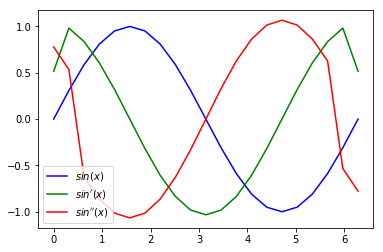

In [37]:
plot(x,f,'b',label='$sin(x)$')
plot(x,df,'g',label='$sin\'(x)$')
plot(x,d2f,'r',label="$sin''(x)$")
legend()
show()


### Aufgabe 2 : Der getriebene, gedaempfte harm. Oszillator

Der getriebene, gedaempfte harmonische Oszillator genuegt der Differentialgleichung

$$
    \ddot x + 2\gamma \dot x + \omega_0^2 x = A \cos(t)
$$
z.B. mit $\gamma=0.1$, $\omega_0=1.0$ und $A=1.0$.
- Schreiben Sie eine Funktion `limit_cycle(omega0=1.0,gamma=0.1,A=1.0,N=100)`, welche die lineare, inhomogene Differentialgleichung in `N` Zeitschritte ueber eine Periode der antreibenen Kraft diskretisiert und als lineares Gleichungssystem 
<br><br>
$$
    \frac{1}{4h^2}\textrm{D}^2\cdot \vec{x} + 2\gamma \frac{1}{2h}\textrm{D}\cdot \vec{x} + \omega_0^2 ~\mathbf{1}\cdot \vec{x} = A cos(\vec{t})
$$
loest. 

- Bestimmen und zeichnen Sie die Amplitude $B$ und die Phasenverschiebung $\varphi$ der Loesung $x = B \cos(t-\varphi)$ als Funktion von $\omega_0$. Hierfuer kann man die numpy Array Methode `x.argmax()` verwenden, welche den Index des maximalen Elements von `x` liefert.
- Zeichnen Sie die analytischen Loesungen
$$
\begin{eqnarray}
    B &=& \frac{A}{\sqrt{(\omega_0^2-1)^2+4\gamma^2}} \\
    \tan\varphi &=& \frac{-2\gamma}{\omega_0^2-1}
\end{eqnarray}
$$
ueber die von Ihnen numerisch gefundenen Loesungen als Funktion der Eigenfrequenz $\omega_0$ des harmonischen Oscillators. *Hinweis :* Die Methode `numpy.arctan2(y,x)` gibt den Winkel `alpha` mit `sin(alpha)=y` und `cos(alpha)=x` zurueck.

In [ ]:
import numpy as np
def limit_cycle(omega0=1.0,gamma=0.1,A=1.0,N=100) :
    """ 
    Bestimmt die Loesung der inhomogenen linearen Differentialgleichung
    d^2x/dt^2 + 2 gamma dx/dt + omega0^2 x = A cos(t)
    auf dem in N Punkte diskretisierten periodischen Zeitintervall [0,2pi)
    """
    
    #your code goes here

In [ ]:
L=100
omega0 = np.linspace(0.1,4,L)
B = np.zeros(L)
phi = np.zeros(L)

# bestimme B und phi numerisch fuer alle Werte in omega0
# definiere die theoretischen Werte Bth und phith


subplot(2,1,1)
plot(omega0,B,label='num.')
plot(omega0,Bth,'k--',label='Theorie')
legend()
xlabel('$\omega_0$')
ylabel('$B$')


subplot(2,1,2)
plot(omega0,phi,label='num.')
plot(omega0,phith,'k--',label='Theorie')
legend()
xlabel('$\omega_0$')
ylabel('$\phi$')
show()